In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
#dfm = pd.read_csv('Xdata12_CornellMMWW.csv')
#dfw = pd.read_csv('RosterLinkedInLabel_CornellMW.csv')

In [3]:
dfmm = pd.read_csv('Predict_YaleM2_mmww.csv')
dfwm = pd.read_csv('RosterLinkedIn_YaleM2.csv')
dfmw = pd.read_csv('Predict_YaleW2_mmww.csv')
dfww = pd.read_csv('RosterLinkedIn_YaleW2.csv')

In [4]:
dfmm.set_index('FirstLast', drop=False, inplace=True)
dfwm.set_index('FirstLast', drop=False, inplace=True)
dfmw.set_index('FirstLast', drop=False, inplace=True)
dfww.set_index('FirstLast', drop=False, inplace=True)

In [5]:
dfwm.index = dfwm.index + dfwm.groupby(level=0).cumcount().astype(str).replace('0','')
dfmm.index = dfmm.index + dfmm.groupby(level=0).cumcount().astype(str).replace('0','')
dfww.index = dfww.index + dfww.groupby(level=0).cumcount().astype(str).replace('0','')
dfmw.index = dfmw.index + dfmw.groupby(level=0).cumcount().astype(str).replace('0','')

In [48]:
#dfwm.info()

In [49]:
#dfww.info()

In [50]:
#dfmm.info()

In [51]:
#dfmw.info()

In [11]:
dfww['prediction'] = dfmw['prediction']
#dfwm['prediction'] = dfmm['prediction']

In [12]:
dfwm['prediction'] = dfmm['prediction']

In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [14]:
dfw = dfww.append(dfwm)

In [15]:
dfm = dfmw.append(dfmm)

In [52]:
#dfw.info()

In [17]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, Sheila Ford to Alan Sou
Data columns (total 15 columns):
FirstLast         564 non-null object
Year              564 non-null int64
YearsPlayed       564 non-null int64
Gender            564 non-null int64
fuzz_ratio        564 non-null float64
fuzz_pratio       564 non-null float64
fuzz_tokensort    564 non-null float64
fuzz_tokenset     564 non-null float64
fuzz_wratio       564 non-null float64
tennis_yn         564 non-null float64
School_yn         564 non-null float64
SameName_yn       564 non-null float64
SameTennis_yn     564 non-null float64
Decade            564 non-null int64
prediction        564 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 70.5+ KB


In [53]:
#dfw['prediction'].value_counts()

In [19]:
dfw['avg_fuzz'] = dfw[['fuzz_ratio', 'fuzz_pratio', 'fuzz_tokensort', 'fuzz_tokenset', 'fuzz_wratio']].mean(axis=1)

In [20]:
dfw['avg_fuzz_ge80'] = (dfw['avg_fuzz'] >= 80)

In [21]:
dfw['avg_fuzz_ge80'][dfw['avg_fuzz_ge80'].isna()] = np.nan
dfw.avg_fuzz_ge80 = dfw.avg_fuzz_ge80.astype(int)

C:\Users\19145\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


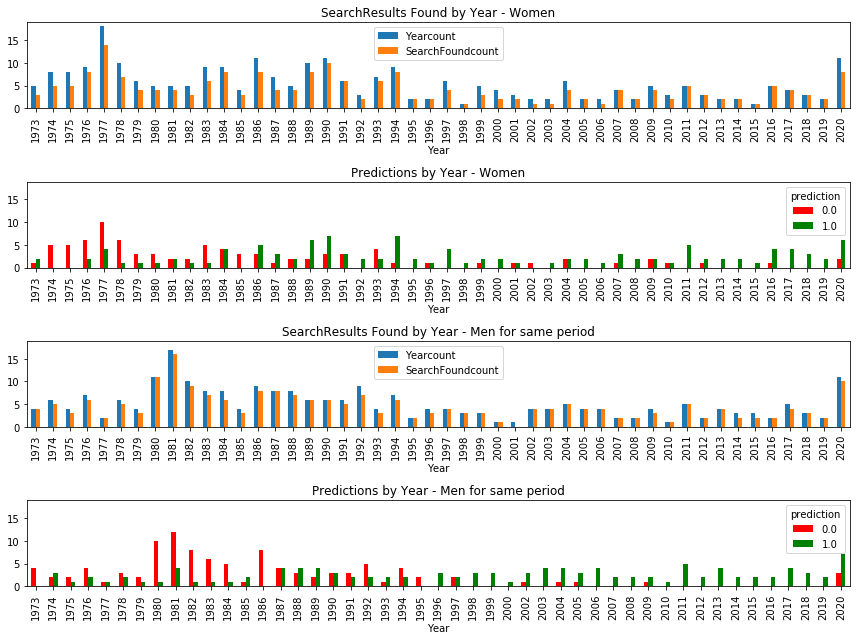

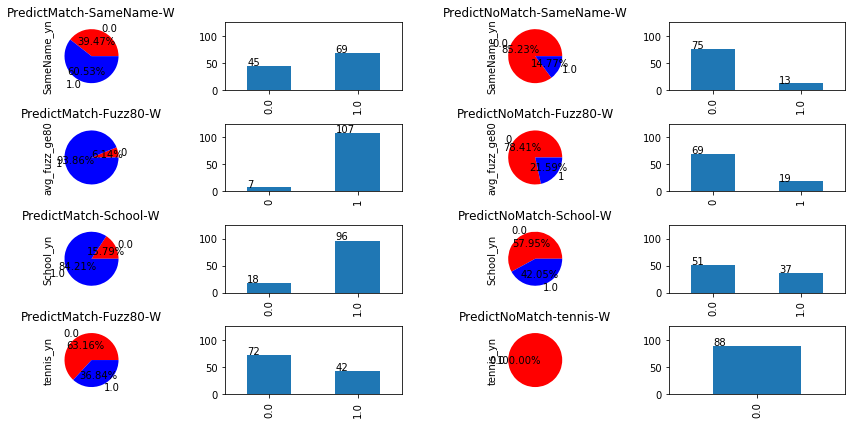

In [62]:
fig, (ax1, ax2, ax3, ax4)\
= plt.subplots(nrows=4, ncols=1, figsize=(12,9), sharey=True)
fig.tight_layout()

ax1.set_title("SearchResults Found by Year - Women")
dfwf = dfw[(dfw['Gender'] == 0)]
yeargroup = dfwf.groupby(['Year']).agg(Year=pd.NamedAgg(column='Year', aggfunc='first'),
                                      Yearcount = pd.NamedAgg(column='Year', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroup.plot.bar('Year', ax=ax1)

ax2.set_title("Predictions by Year - Women")
tabf = pd.crosstab(dfwf['Year'] , dfwf['prediction'])
tabf.plot(kind='bar', ax=ax2, colors='rg')

ax3.set_title("SearchResults Found by Year - Men for same period")
dfwm73 = dfw[(dfw['Gender'] == 1) & (dfw['Year'] >= 1973)]
yeargroupm73 = dfwm73.groupby(['Year']).agg(Year=pd.NamedAgg(column='Year', aggfunc='first'),
                                      Yearcount = pd.NamedAgg(column='Year', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroupm73.plot.bar('Year', ax=ax3)

ax4.set_title("Predictions by Year - Men for same period")
tabm73 = pd.crosstab(dfwm73['Year'] , dfwm73['prediction'])
tabm73.plot(kind='bar', ax=ax4, colors='rg')
fig.tight_layout()

plt.show()

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,6))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,125)

    ax3.set_title("PredictNoMatch-SameName-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,125)

ax5.set_title("PredictMatch-Fuzz80-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,125)


ax7.set_title("PredictNoMatch-Fuzz80-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,125)


ax9.set_title("PredictMatch-School-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,125)


ax11.set_title("PredictNoMatch-School-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,125)

ax13.set_title("PredictMatch-Fuzz80-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,125)


ax15.set_title("PredictNoMatch-tennis-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,125)
    
        

fig.tight_layout()    
plt.show()


In [24]:
Total = len(dfw['SearchResult'])
LinkedInCount = len(dfw['SearchResult']) - dfw['SearchResult'].isnull().sum()
LinkedInPct = LinkedInCount/Total
dfw_match = dfw.loc[dfw['prediction'] == 1]
Match = len(dfw_match['SearchResult'])
MatchPct = Match/LinkedInCount
TotalPct = Match/Total

In [25]:
dfw_bool = dfw.notnull()

The number of LinkedIn profiles found is 564 out of 683 or 82.58%
The number of Predicted Matches for profiles found is 245 out of 564 or 43.44%
The overall ratio of Predicted Matching profiles is 245 out of 683 or 35.87%


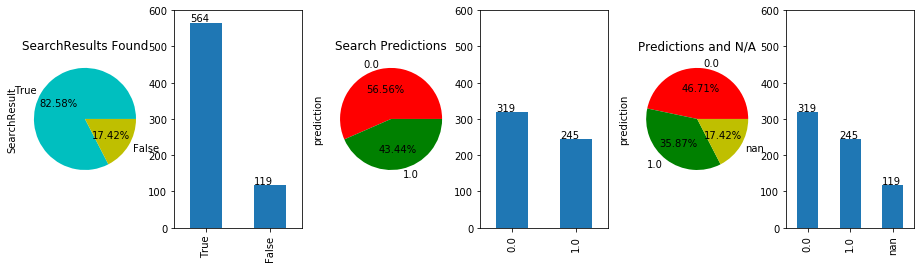

In [26]:
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("SearchResults Found")
dfw_bool.SearchResult.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfw_bool.SearchResult.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,600)

ax[2].set_title("Search Predictions")
dfw.prediction.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfw.prediction.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,600)

ax[4].set_title("Predictions and N/A")
dfw.prediction.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfw.prediction.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,600)

print('The number of LinkedIn profiles found is ' + str(LinkedInCount)+ ' out of '+ str(Total) + ' or ' +\
     str(round(LinkedInPct*100,2)) +"%")
print('The number of Predicted Matches for profiles found is ' + str(Match)+ ' out of '+ str(LinkedInCount) + ' or ' +\
     str(round(MatchPct*100,2)) +"%")
print('The overall ratio of Predicted Matching profiles is ' + str(Match)+ ' out of '+ str(Total) + ' or ' +\
     str(round(TotalPct*100,2)) +"%")
    
plt.show()


In [27]:
dfw_M = dfw[(dfw['Gender']==1)]
dfw_boolM = dfw_M.notnull()

In [30]:
dfw_W = dfw[(dfw['Gender']==0)]
dfw_boolW = dfw_W.notnull()

In [31]:
TotalW = len(dfw_W['SearchResult'])
LinkedInCountW = len(dfw_W['SearchResult']) - dfw_W['SearchResult'].isnull().sum()
LinkedInPctW = LinkedInCount/Total
dfw_matchW = dfw_W.loc[dfw['prediction'] == 1]
MatchW = len(dfw_matchW['SearchResult'])
MatchPctW = MatchW/LinkedInCountW
TotalPctW = MatchW/TotalW

In [28]:
TotalM = len(dfw_M['SearchResult'])
LinkedInCountM = len(dfw_M['SearchResult']) - dfw_M['SearchResult'].isnull().sum()
LinkedInPctM = LinkedInCount/Total
dfw_matchM = dfw_M.loc[dfw['prediction'] == 1]
MatchM = len(dfw_matchM['SearchResult'])
MatchPctM = MatchM/LinkedInCountM
TotalPctM = MatchM/TotalM

The number of Men LinkedIn profiles found is 362 out of 424 or 82.58%
The number of Men Predicted Matches for profiles found is 131 out of 362 or 36.19%
The overall ratio of Men Predicted Matching profiles is 131 out of 424 or 30.9%


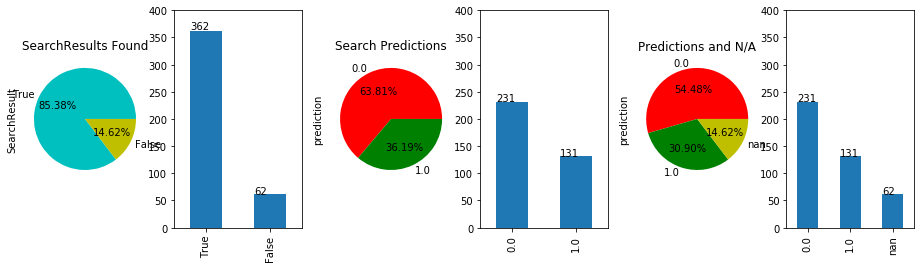

The number of Women LinkedIn profiles found is 202 out of 259 or 82.58%
The number of Women Predicted Watches for profiles found is 114 out of 202 or 56.44%
The overall ratio of Women Predicted Watching profiles is 114 out of 259 or 44.02%


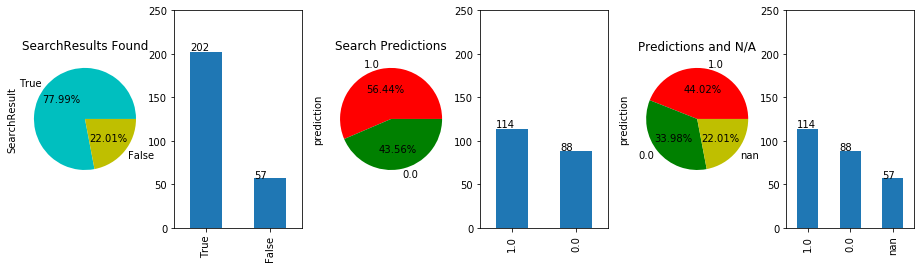

In [57]:
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("SearchResults Found")
dfw_boolM.SearchResult.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfw_boolM.SearchResult.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,400)

ax[2].set_title("Search Predictions")
dfw[(dfw['Gender']==1)].prediction.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfw[(dfw['Gender']==1)].prediction.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,400)

ax[4].set_title("Predictions and N/A")
dfw[(dfw['Gender']==1)].prediction.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfw[(dfw['Gender']==1)].prediction.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,400)

print('The number of Men LinkedIn profiles found is ' + str(LinkedInCountM)+ ' out of '+ str(TotalM) + ' or ' +\
     str(round(LinkedInPctM*100,2)) +"%")
print('The number of Men Predicted Matches for profiles found is ' + str(MatchM)+ ' out of '+ str(LinkedInCountM) + ' or ' +\
     str(round(MatchPctM*100,2)) +"%")
print('The overall ratio of Men Predicted Matching profiles is ' + str(MatchM)+ ' out of '+ str(TotalM) + ' or ' +\
     str(round(TotalPctM*100,2)) +"%")
    
plt.show()

fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("SearchResults Found")
dfw_boolW.SearchResult.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfw_boolW.SearchResult.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,250)

ax[2].set_title("Search Predictions")
dfw[(dfw['Gender']==0)].prediction.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfw[(dfw['Gender']==0)].prediction.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,250)

ax[4].set_title("Predictions and N/A")
dfw[(dfw['Gender']==0)].prediction.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfw[(dfw['Gender']==0)].prediction.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,250)

print('The number of Women LinkedIn profiles found is ' + str(LinkedInCountW)+ ' out of '+ str(TotalW) + ' or ' +\
     str(round(LinkedInPctW*100,2)) +"%")
print('The number of Women Predicted Watches for profiles found is ' + str(MatchW)+ ' out of '+ str(LinkedInCountW) + ' or ' +\
     str(round(MatchPctW*100,2)) +"%")
print('The overall ratio of Women Predicted Watching profiles is ' + str(MatchW)+ ' out of '+ str(TotalW) + ' or ' +\
     str(round(TotalPctW*100,2)) +"%")
    
plt.show()



The number of Women LinkedIn profiles found is 202 out of 259 or 82.58%
The number of Women Predicted Watches for profiles found is 114 out of 202 or 56.44%
The overall ratio of Women Predicted Watching profiles is 114 out of 259 or 44.02%


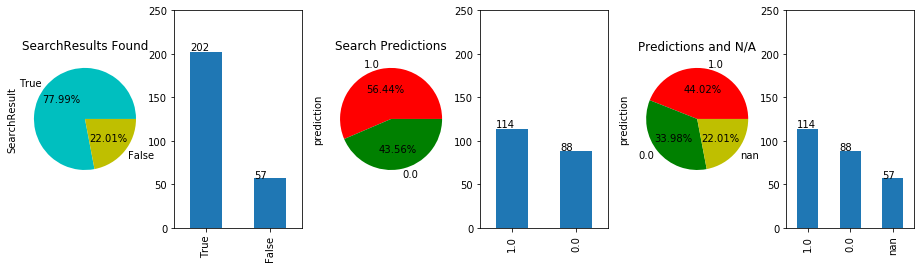

In [32]:
fig, ax = plt.subplots(1,6, figsize=(16,4))

ax[0].set_title("SearchResults Found")
dfw_boolW.SearchResult.value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], colors='cy')
dfw_boolW.SearchResult.value_counts().plot(kind='bar', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[1].set_ylim(0,250)

ax[2].set_title("Search Predictions")
dfw[(dfw['Gender']==0)].prediction.value_counts().plot.pie(autopct='%.2f%%', ax=ax[2], colors='rg')
dfw[(dfw['Gender']==0)].prediction.value_counts().plot(kind='bar', ax=ax[3])
for p in ax[3].patches:
    ax[3].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[3].set_ylim(0,250)

ax[4].set_title("Predictions and N/A")
dfw[(dfw['Gender']==0)].prediction.value_counts(dropna=False).plot.pie(autopct='%.2f%%', ax=ax[4], colors='rgy')
dfw[(dfw['Gender']==0)].prediction.value_counts(dropna=False).plot(kind='bar', ax=ax[5])
for p in ax[5].patches:
    ax[5].annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
    ax[5].set_ylim(0,250)

print('The number of Women LinkedIn profiles found is ' + str(LinkedInCountW)+ ' out of '+ str(TotalW) + ' or ' +\
     str(round(LinkedInPctW*100,2)) +"%")
print('The number of Women Predicted Watches for profiles found is ' + str(MatchW)+ ' out of '+ str(LinkedInCountW) + ' or ' +\
     str(round(MatchPctW*100,2)) +"%")
print('The overall ratio of Women Predicted Watching profiles is ' + str(MatchW)+ ' out of '+ str(TotalW) + ' or ' +\
     str(round(TotalPctW*100,2)) +"%")
    
plt.show()


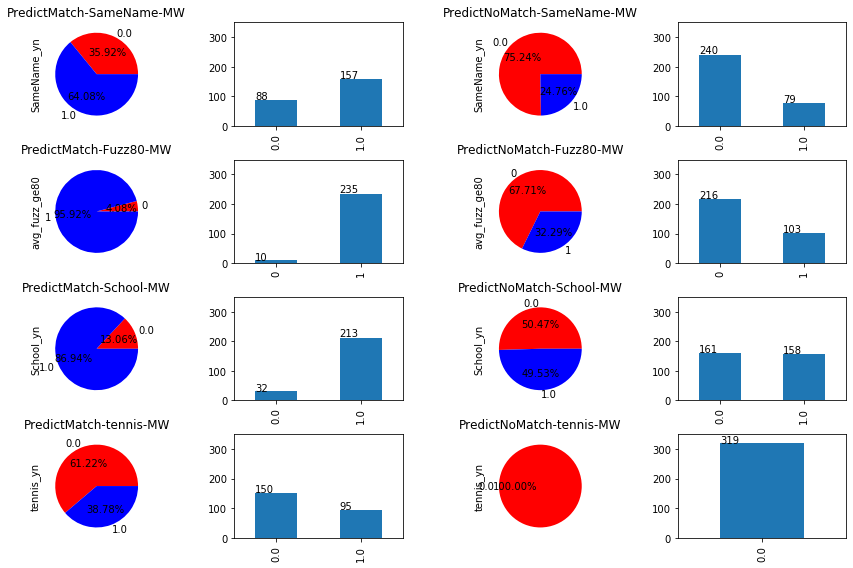

In [47]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-MW")
dfw[(dfw['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw[(dfw['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,350)

    ax3.set_title("PredictNoMatch-SameName-MW")
dfw[(dfw['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw[(dfw['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,350)

ax5.set_title("PredictMatch-Fuzz80-MW")
dfw[(dfw['prediction'] == 1)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw[(dfw['prediction'] == 1)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,350)


ax7.set_title("PredictNoMatch-Fuzz80-MW")
dfw[(dfw['prediction'] == 0)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw[(dfw['prediction'] == 0)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,350)


ax9.set_title("PredictMatch-School-MW")
dfw[(dfw['prediction'] == 1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw[(dfw['prediction'] == 1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,350)


ax11.set_title("PredictNoMatch-School-MW")
dfw[(dfw['prediction'] == 0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw[(dfw['prediction'] == 0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,350)

ax13.set_title("PredictMatch-tennis-MW")
dfw[(dfw['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw[(dfw['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,350)


ax15.set_title("PredictNoMatch-tennis-MW")
dfw[(dfw['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw[(dfw['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.002))
    ax16.set_ylim(0,350)
    
        

fig.tight_layout()    
plt.show()


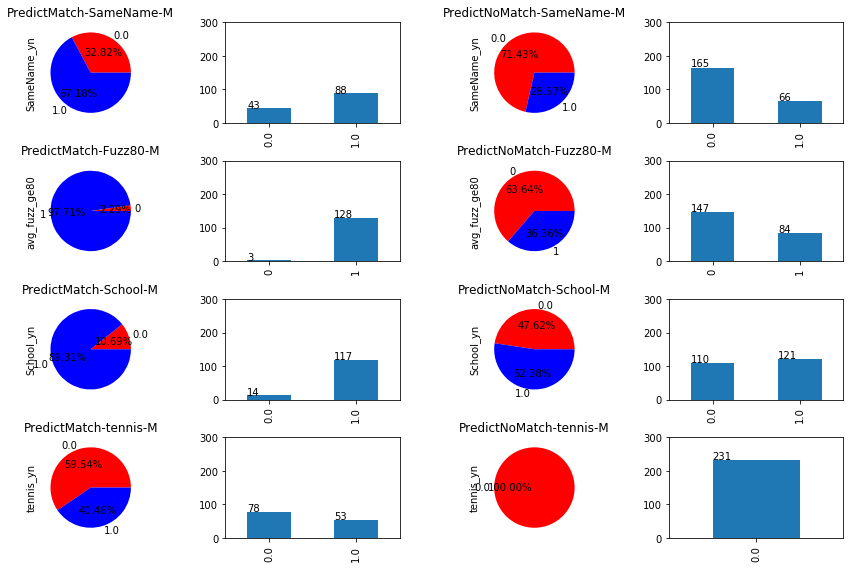

In [33]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-M")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,300)

    ax3.set_title("PredictNoMatch-SameName-M")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,300)

ax5.set_title("PredictMatch-Fuzz80-M")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,300)


ax7.set_title("PredictNoMatch-Fuzz80-M")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,300)


ax9.set_title("PredictMatch-School-M")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,300)


ax11.set_title("PredictNoMatch-School-M")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,300)

ax13.set_title("PredictMatch-tennis-M")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,300)


ax15.set_title("PredictNoMatch-tennis-M")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,300)
    
        

fig.tight_layout()    
plt.show()


In [34]:
dfw73 = dfw[dfw['Year'] >= 1973]

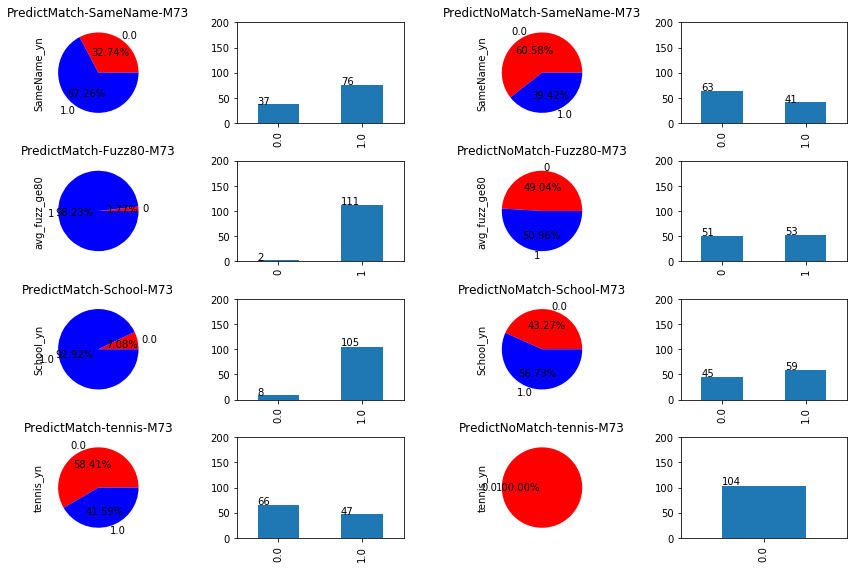

In [35]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-M73")
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,200)

    ax3.set_title("PredictNoMatch-SameName-M73")
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,200)

ax5.set_title("PredictMatch-Fuzz80-M73")
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,200)


ax7.set_title("PredictNoMatch-Fuzz80-M73")
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,200)


ax9.set_title("PredictMatch-School-M73")
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,200)


ax11.set_title("PredictNoMatch-School-M73")
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,200)

ax13.set_title("PredictMatch-tennis-M73")
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw73[(dfw73['prediction'] == 1) & (dfw73['Gender']==1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,200)


ax15.set_title("PredictNoMatch-tennis-M73")
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw73[(dfw73['prediction'] == 0) & (dfw73['Gender']==1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,200)
    
        

fig.tight_layout()    
plt.show()

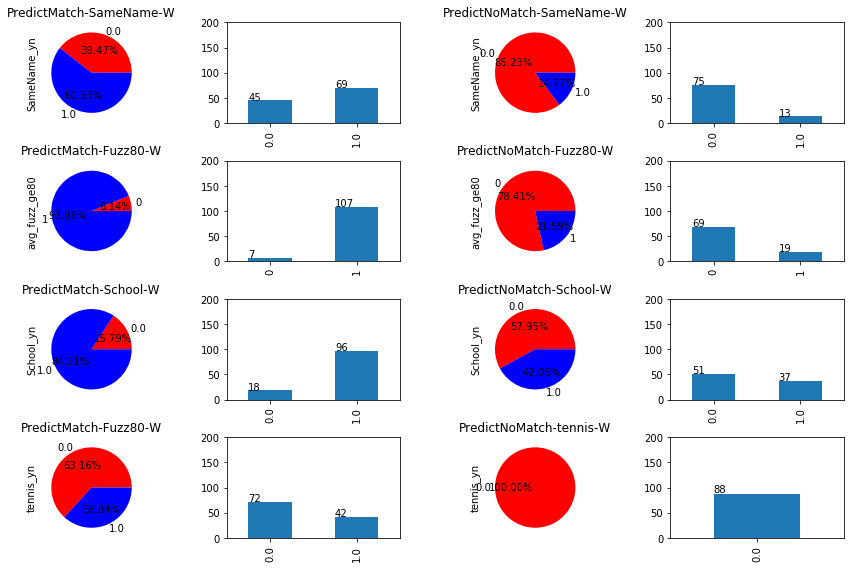

In [36]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,200)

    ax3.set_title("PredictNoMatch-SameName-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,200)

ax5.set_title("PredictMatch-Fuzz80-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,200)


ax7.set_title("PredictNoMatch-Fuzz80-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,200)


ax9.set_title("PredictMatch-School-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,200)


ax11.set_title("PredictNoMatch-School-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,200)

ax13.set_title("PredictMatch-Fuzz80-W")
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw[(dfw['prediction'] == 1) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,200)


ax15.set_title("PredictNoMatch-tennis-W")
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw[(dfw['prediction'] == 0) & (dfw['Gender']==0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,200)
    
        

fig.tight_layout()    
plt.show()


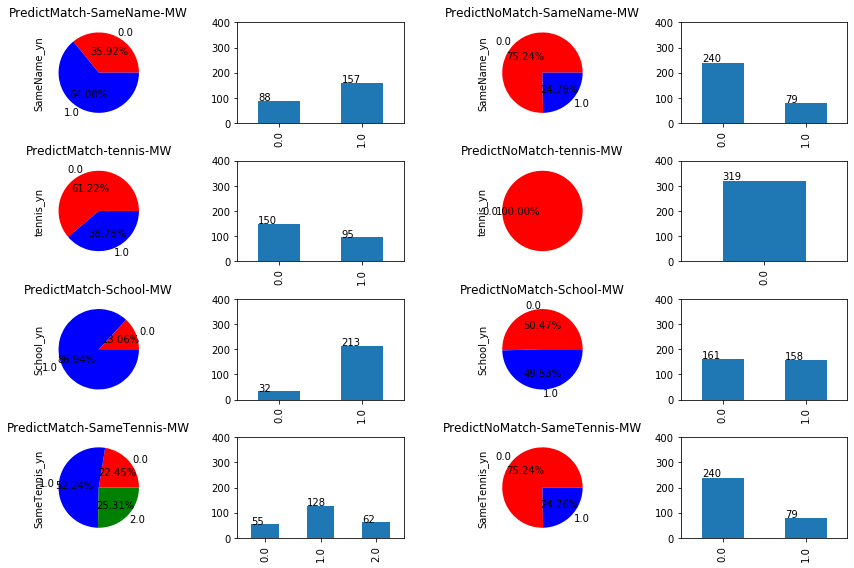

In [44]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-MW")
dfw[(dfw['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw[(dfw['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,400)

    ax3.set_title("PredictNoMatch-SameName-MW")
dfw[(dfw['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw[(dfw['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,400)


ax5.set_title("PredictMatch-tennis-MW")
dfw[(dfw['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw[(dfw['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,400)


ax7.set_title("PredictNoMatch-tennis-MW")
dfw[(dfw['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw[(dfw['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,400)


ax9.set_title("PredictMatch-School-MW")
dfw[(dfw['prediction'] == 1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw[(dfw['prediction'] == 1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,400)


ax11.set_title("PredictNoMatch-School-MW")
dfw[(dfw['prediction'] == 0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw[(dfw['prediction'] == 0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,400)

        
ax13.set_title("PredictMatch-SameTennis-MW")
dfw[(dfw['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw[(dfw['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,400)


ax15.set_title("PredictNoMatch-SameTennis-MW")
dfw[(dfw['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw[(dfw['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,400)

fig.tight_layout()    
plt.show()


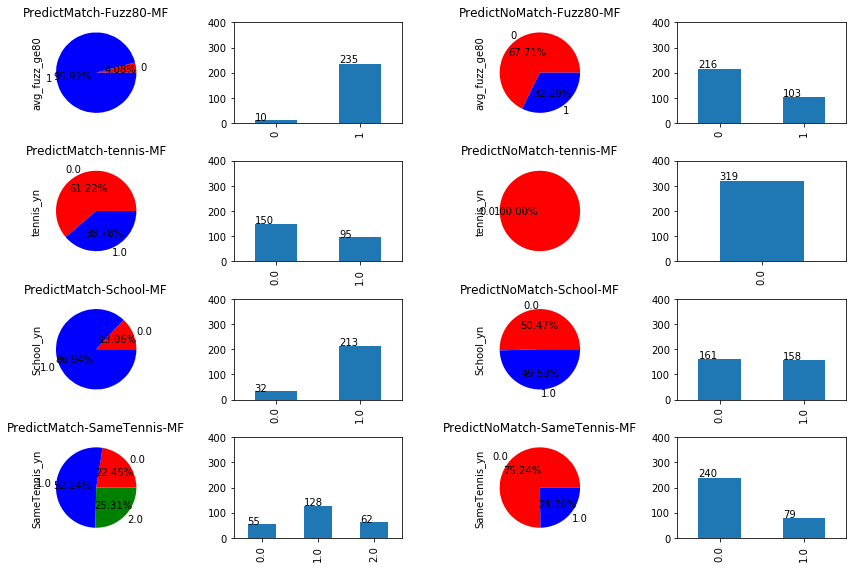

In [38]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-Fuzz80-MF")
dfw[(dfw['prediction'] == 1)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw[(dfw['prediction'] == 1)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,400)

    ax3.set_title("PredictNoMatch-Fuzz80-MF")
dfw[(dfw['prediction'] == 0)].avg_fuzz_ge80.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw[(dfw['prediction'] == 0)].avg_fuzz_ge80.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,400)


ax5.set_title("PredictMatch-tennis-MF")
dfw[(dfw['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw[(dfw['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,400)


ax7.set_title("PredictNoMatch-tennis-MF")
dfw[(dfw['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw[(dfw['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,400)


ax9.set_title("PredictMatch-School-MF")
dfw[(dfw['prediction'] == 1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw[(dfw['prediction'] == 1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,400)


ax11.set_title("PredictNoMatch-School-MF")
dfw[(dfw['prediction'] == 0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw[(dfw['prediction'] == 0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,400)

        
ax13.set_title("PredictMatch-SameTennis-MF")
dfw[(dfw['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw[(dfw['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,400)


ax15.set_title("PredictNoMatch-SameTennis-MF")
dfw[(dfw['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw[(dfw['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,400)

fig.tight_layout()    
plt.show()


In [39]:
dfw73 = dfw[(dfw['Year'] >= 1973)]


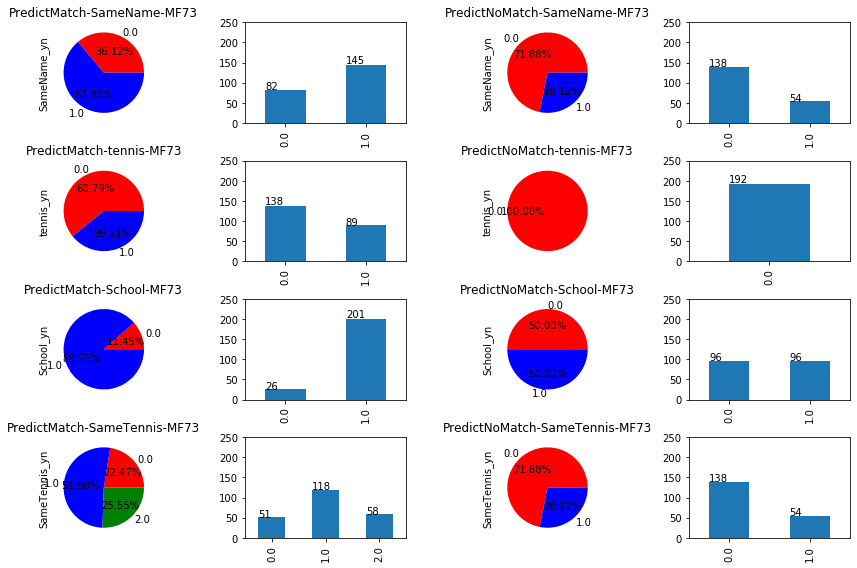

In [40]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))\
= plt.subplots(nrows=4, ncols=4, figsize=(12,8))
fig.tight_layout()

ax1.set_title("PredictMatch-SameName-MF73")
dfw73[(dfw73['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='rbg')
dfw73[(dfw73['prediction'] == 1)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,250)

    ax3.set_title("PredictNoMatch-SameName-MF73")
dfw73[(dfw73['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rbg')
dfw73[(dfw73['prediction'] == 0)].SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,250)


ax5.set_title("PredictMatch-tennis-MF73")
dfw73[(dfw73['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='rbg')
dfw73[(dfw73['prediction'] == 1)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,250)


ax7.set_title("PredictNoMatch-tennis-MF73")
dfw73[(dfw73['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='rbg')
dfw73[(dfw73['prediction'] == 0)].tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax8.set_ylim(0,250)


ax9.set_title("PredictMatch-School-MF73")
dfw73[(dfw73['prediction'] == 1)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax9, colors='rbg')
dfw73[(dfw73['prediction'] == 1)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax10)
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax10.set_ylim(0,250)


ax11.set_title("PredictNoMatch-School-MF73")
dfw73[(dfw73['prediction'] == 0)].School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax11, colors='rbg')
dfw73[(dfw73['prediction'] == 0)].School_yn.value_counts().sort_index().plot(kind='bar', ax=ax12)
for p in ax12.patches:
    ax12.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax12.set_ylim(0,250)

        
ax13.set_title("PredictMatch-SameTennis-MF73")
dfw73[(dfw73['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax13, colors='rbg')
dfw73[(dfw73['prediction'] == 1)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax14)
for p in ax14.patches:
    ax14.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax14.set_ylim(0,250)


ax15.set_title("PredictNoMatch-SameTennis-MF73")
dfw73[(dfw73['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax15, colors='rbg')
dfw73[(dfw73['prediction'] == 0)].SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax16)
for p in ax16.patches:
    ax16.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax16.set_ylim(0,250)

fig.tight_layout()    
plt.show()


In [41]:
cols_to_order = ['prediction', 'avg_fuzz_ge80', 'Gender', 'FirstLast', 'LName', 'SearchResult', 'Year', 'YearsPlayed', 'Headline', 'Location', 'Company', 'RosterLink', 'Hometown', 'HS']
new_columns = cols_to_order + (dfw.columns.drop(cols_to_order).tolist())
dfw= dfw[new_columns]

In [42]:
dfw.to_csv('YaleData.csv')

In [43]:
dfw

,prediction,avg_fuzz_ge80,Gender,FirstLast,LName,SearchResult,Year,YearsPlayed,Headline,Location,Company,RosterLink,Hometown,HS,Criteria,ClassYear,College,First,Last,MidInit,MidName,Name,RosterYear,School,Activites,fuzz_ratio,fuzz_pratio,fuzz_tokensort,fuzz_tokenset,fuzz_wratio,tennis_yn,School_yn,SameName_yn,SameTennis_yn,Decade,avg_fuzz
Sally MacPartland,NaN,0,0,Sally MacPartland,NaN,NaN,1973,2,NaN,NaN,NaN,NaN,NaN,NaN,Yale,NaN,Yale University,Sally,MacPartland,A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,NaN
Elizabeth Auchincloss,NaN,0,0,Elizabeth Auchincloss,NaN,NaN,1973,2,NaN,NaN,NaN,NaN,NaN,NaN,Yale,NaN,Yale University,Elizabeth,Auchincloss,L.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,NaN
Sheila Ford,0.0,0,0,Sheila Ford,Brian McManamon,https://www.linkedin.com/in/brian-mcmanamon-65...,1973,1,Actor at Warner Bros. Entertainment Group of C...,Greater New York City Area,Not Found,NaN,NaN,NaN,Yale,NaN,Yale University,Sheila,Ford,F.,NaN,NaN,NaN,[],[],31.0,18.0,23.0,23.0,31.0,0.0,0.0,0.0,0.0,1970,25.2
Sarah Fox,1.0,1,0,Sarah Fox,Sarah Fox,https://www.linkedin.com/in/sarah-fox-8a2977191/,1973,1,"Musician, Historian, Poet at Yale Institute o...","Hartford, Connecticut Area",Yale Institute of Sacred Music,NaN,NaN,NaN,Yale,NaN,Yale University,Sarah,Fox,M.,NaN,NaN,NaN,[],[],100.0,100.0,100.0,100.0,100.0,0.0,0.0,1.0,1.0,1970,100.0
Diane Straus,1.0,1,0,Diane Straus,Diane Strauss,https://www.linkedin.com/in/diane-strauss-4307...,1973,2,"Research Director, Yale Initiative for Sustain...","Paris Area, France",Yale University,NaN,NaN,NaN,Yale,NaN,Yale University,Diane,Straus,E.,NaN,NaN,NaN,"['Sciences-PO Bordeaux', 'Sciences-PO Strasbou...","['Le Cid Citrique association, theater improvi...",96.0,100.0,96.0,96.0,96.0,0.0,0.0,0.0,0.0,1970,96.8
Lucy Daggett,0.0,1,0,Lucy Daggett,Lucy Daggett,https://www.linkedin.com/in/lucy-daggett-96064...,1974,2,High School Guidance Counselor,San Francisco Bay Area,Pittsburg Unified School District,NaN,NaN,NaN,Yale,NaN,Yale University,Lucy,Daggett,L.,NaN,NaN,NaN,"['Yale University', 'California State Universi...",[],100.0,100.0,100.0,100.0,100.0,0.0,1.0,1.0,1.0,1970,100.0
Linden Havemeyer,NaN,0,0,Linden Havemeyer,NaN,NaN,1974,3,NaN,NaN,NaN,NaN,NaN,NaN,Yale,NaN,Yale University,Linden,Havemeyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,NaN
Louise Lippincott,NaN,0,0,Louise Lippincott,NaN,NaN,1974,1,NaN,NaN,NaN,NaN,NaN,NaN,Yale,NaN,Yale University,Louise,Lippincott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,NaN
Margaret Mercer,0.0,0,0,Margaret Mercer,Margaret Pfister,https://www.linkedin.com/in/margaret-pfister-5...,1974,3,Staff Physician at VNA Health Care,Greater Chicago Area,VNA Health Care,NaN,NaN,NaN,Yale,NaN,Yale University,Margaret,Mercer,C.,NaN,NaN,NaN,['Northwestern University - The Feinberg Schoo...,[],71.0,67.0,71.0,71.0,71.0,0.0,1.0,0.0,0.0,1970,70.2
Deborah Rhode,0.0,0,0,Deborah Rhode,Deborah Pan,https://www.linkedin.com/in/deborah-pan-9940511/,1974,1,"Plastic Surgeon, Founding CEO at Esana Plastic...",Greater New York City Area,Esana Plastic Surgery Center & MedSpa,NaN,NaN,NaN,Yale,NaN,Yale University,Deborah,Rhode,L.,NaN,NaN,NaN,['The Johns Hopkins University School of Medic...,['Phi Beta Kappa'],67.0,73.0,67.0,78.0,74.0,0.0,1.0,0.0,0.0,1970,71.8
